# 12.1

## a)

### Mathematisch

$$ P(M_N=m)={N \choose \frac{N+m}{2}}p^{(N+m)/2} \cdot q^{(N-m)/2} $$

mit $N=1000$ und $m=1000$:

$$ P(X=1000)={1000 \choose 1000} 0.5^{1000} \cdot 0.5^0 \approx 0 $$

### Python

In [1]:
from scipy.stats import binom

p = binom.pmf(k=1000, n=1000, p=0.5)
print('{:.3f}'.format(p))

0.000


## b)

Anzahl Schritte: $N$, Schritte nach Rechts: $X$, Schritte nach links: $N-X$

### Mittlere Position

$$ M_N = X-(N-X) = 2X-N $$

$$ E[M_N] = 2 \cdot E[X] - N $$

Aus der Definition:

$$ E[X] = N \cdot \pi $$

folgt:

$$ E[M_N] = 2 \cdot N \cdot \pi - N $$

mit $\pi=0.5$:

$$ \underline{\underline{E[M_N]}} = 2 \cdot N \cdot 0.5 - N = N - N = \underline{\underline{0}} $$

### Quadratisch gemittelte  Verschiebung

Aus:

$$ \sqrt{E[M^2_N]} $$

und:

$$ M_N = X-(N-X) $$

folgt:

$$ \sqrt{E[M^2_N]} = \sqrt{E[(X-(N-X))^2]} = \sqrt{E[(2X-N)^2]} = \sqrt{E[4X^2-4XN+N^2]} = \sqrt{4 \cdot E[X^2] -4 \cdot E[X] \cdot N + N^2} $$

Aus:

$$ Var(X) = N \cdot \pi(1 - \pi) = N \cdot \pi \cdot q = E[X^2] - (E[X])^2 = E[X^2] - (N \cdot \pi)^2 $$

und:

$$ E[X] = N \cdot \pi $$

folgt:

$$ E[X^2] = N \cdot \pi \cdot q + N^2 \cdot \pi^2 $$

Eingesetzt in die obere Wurzel:

$$ \sqrt{4(N \cdot \pi \cdot q + N^2 \cdot \pi^2) + N^2 - 4 \cdot N^2 \cdot \pi} $$

mit $\pi = 0.5$ und $N=1000$:

$$ \sqrt{2Nq} $$

und $q=1-\pi=0.5$:

$$ \sqrt{N} = \sqrt{1000} \approx \underline{\underline{31.6}} $$

## c)

Verteilung:

$$ X \sim \mathcal{N}(\mu,\sigma^2), \mu=0, \sigma=1 $$

Gegeben:

$$ x_0=0 $$ 

$$ S(1) = x_0 + X_1 $$

$$ S(2) = x_0 + X_1 + X_2 $$

$$ S(N) = x_0 + \sum^N_{i=1}X_i, N=1000 $$

Gesucht:

$$ E[S(N)], Var[S(N)] $$

nach $N$ Schritten an Position:

$$ E[S(N)] = x_0 + E\Big( \sum^N_{i=1}X_i \Big) = x_0 + N \cdot \mu = 0 + 1000 \cdot 0 = \underline{\underline{0}} $$

mit Abweichung $\sqrt{N}\sigma$

$$ Var[S(N)] = Var \Big( \sum^N_{i=1}X_i \Big) = N \cdot \sigma^2 = 1000 \cdot 1^2 = \underline{\underline{1000}} $$

$$ \sigma_{S(N)} = \sqrt(Var[S(N)]) = \sqrt{1000} \approx 31.6 $$

## d)

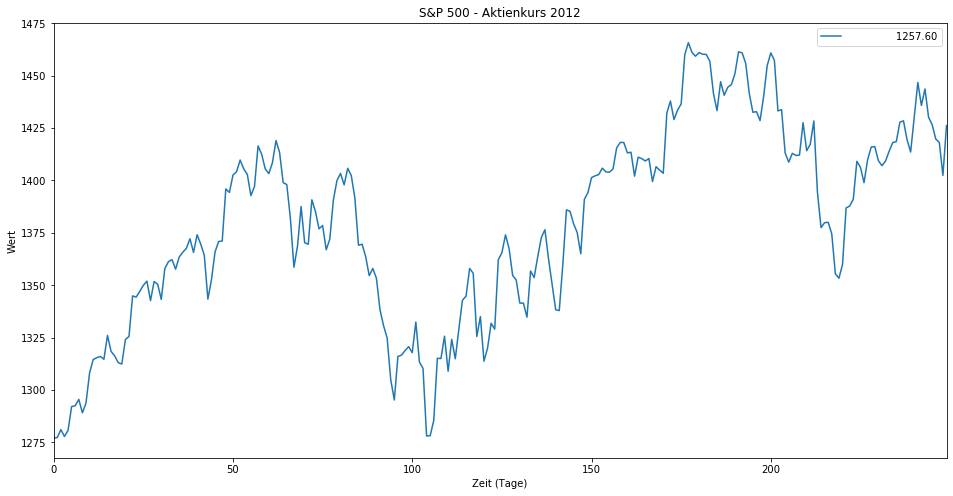

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.rcParams['figure.figsize'] = [16, 8]
sp2012 = pd.DataFrame(pd.read_csv('sp2012.txt'))
sp2012.plot()
plt.xlabel('Zeit (Tage)')
plt.ylabel('Wert')
plt.title('S&P 500 - Aktienkurs 2012')
plt.show()

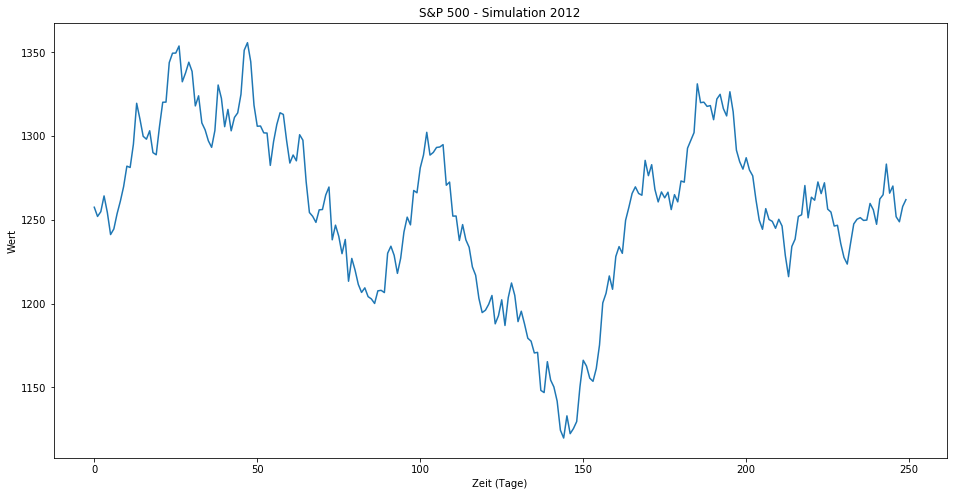

In [17]:
from scipy.stats import norm

steps = np.array(norm.rvs(size=250, loc=0.483, scale=11))
sp_simulated = np.empty([250])
sp_simulated[0] = 1257.6
for i in range(249):
    sp_simulated[i+1] = sp_simulated[i] + steps[i]
plt.plot(sp_simulated)
plt.xlabel('Zeit (Tage)')
plt.ylabel('Wert')
plt.title('S&P 500 - Simulation 2012')
plt.show()

# 12.2

$$ X(t) = T + (1 - t) $$

$$ T \sim \mathcal{U}([0,1]) $$

## a)

gesucht: kumulative Verteilungsfunction von $ X(t) $.

$$ P[X(t) \leq x] = P[T \leq x - (1-t)] $$

$$ P[T \leq y] = 0, y < 0$$

$$ \underline{P[T \leq y] = y, 0 < y < 1} $$

$$ P[T \leq y] = 1, y > 1 $$

$ y $ durch $ x-(1-t) $ ersetzen:

$$ \underline{\underline{F_X(x, t)}} = P[X(t) \leq x] = P[T \leq x - (1 - t)] $$

$$ = 0, x < 1-t $$

$$ = \underline{\underline{x-(1-t)}}, 1-t<x<2-t $$

$$ = 1, x>2-t $$

## b)

gesucht: Wahrscheinlichkeitsdichtefunction von $X(t)$

$$ f_X(x,t) = \frac{\mathcal{d}}{\mathcal{d}x}F_X(x) = 1 \quad \text{für} \quad t-t<x<2-t $$

$$ = 0 \quad \text{sonst} $$

## c)

gesucht: Scharmittelwert $\mu_x(t)$

$$ \underline{\underline{\mu_X(t)}} = E[X(t)] = \int^{2-t}_{1-t} x \mathcal{d}x = \frac{x^2}{2} \Big |^{2-t}_{1-t} = \frac{(2-t)^2}{2} - \frac{(1-t)^2}{2} = \frac{4-4t-t^2-(1-2t+t^2)}{2} = \frac{-2t+3}{2} = \underline{\underline{\frac{3}{2}-t}} $$

alternative Lösung:

$$ T \sim \mathcal{U}([0,1]): E[T]=0.5\Big(E[T^2]=\frac{1}{3}\Big) $$

$$ \underline{\underline{\mu_X(t)}}=E[X(t)]=E[T+(1-t)]=1-t+E[T]=1-t+\frac{1}{2}=\frac{2}{2}-t+\frac{1}{2}=\underline{\underline{\frac{3}{2}-t}} $$

## d)

Der Scharmittelwert ist abhängig von der Zeit: es handelt sich um einen nicht-stationären Prozess.

# 12.3

$$ X(t) = A \cdot exp(-t) $$

$$ A \sim \mathcal{N}(\mu,\sigma^2), \sigma=2 $$

## a)

gegeben:

$$ t_0 = ln(2), \overline{x}(t=t_0)=2.5 $$

gesucht: $\mu$

$$ \mu=E[A] \rightarrow E[X(t=t_0)]=exp(-ln(2)) \cdot E[A] = \frac{1}{2}\mu $$

Momentenmethode:

$$ \hat{E}[X(t=t_0)]=\frac{1}{2}\hat{\mu}=2.5 \Leftrightarrow \underline{\underline{\hat{\mu}=5}} $$

## b)

gegeben:

$$ \mu=5, \sigma=2 $$

gesucht:

$$ P[X(t-t_0)] > 0.5 = P[A \cdot exp(-ln(2)) > 0.5] = P[A>1] = 1-P[A \leq 1] $$

In [1]:
from scipy.stats import norm

p = 1 - norm.cdf(x=1, loc=5, scale=2)
print('{:.3f}'.format(p))

0.977


## c)

gesucht:

$$ \mu_X(t) = E[X(t)] = E[A] \cdot exp(-t) = \mu \cdot exp(-t) $$

## d)

gesucht:

$$ Var[X(t)] = Var(A) \cdot exp(-2t) = 4 \cdot exp(-2t) $$

TODO: wie weiter?

## e)

gegeben:

$$ x=10, t=ln \Big(\frac{1}{2} \Big) $$

gesucht:

$$ F(x,t) = P[X(t) \leq x] = P[A \cdot exp(-t) \leq x] = P[A \leq x \cdot exp(t)] = \Phi(x \cdot exp(t)) $$

TODO: wie weiter?

## f)

TODO

## g)

nicht-stationär, da zeitabhängig